#### Plot RAPID data

In [1]:
import os
# Activate the venv
venv_dir = os.path.join(os.path.expanduser("~"), "nb-venvs/venv-notebook")
activate_file = os.path.join(venv_dir, "bin", "activate_this.py")
exec(open(activate_file).read(), dict(__file__=activate_file))

from netCDF4 import Dataset
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import cftime
%matplotlib inline

#### Timeseries

Text(0, 0.5, 'Transport (Sv)')

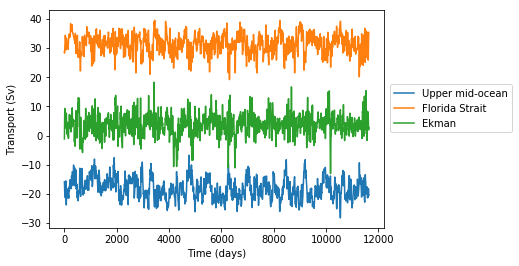

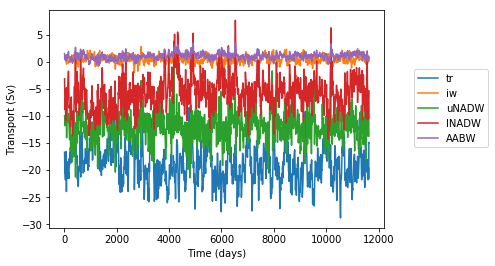

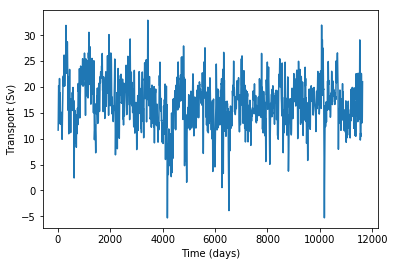

In [4]:
outfile = ('/home/users/jordi/RAPID_data/moc_transports.nc')
ncid = Dataset(outfile,'r')

umo  = ncid.variables['t_umo10'][:]
gs  = ncid.variables['t_gs10'][:]
ekm  = ncid.variables['t_ek10'][:]
moc   = ncid.variables['moc_mar_hc10'][:]
tr   = ncid.variables['t_therm10'][:]
iw   = ncid.variables['t_aiw10'][:]
uNADW   = ncid.variables['t_ud10'][:]
lNADW   = ncid.variables['t_ld10'][:]
AABW   = ncid.variables['t_bw10'][:]

ncid.close()

plt.figure(1)
plt.plot(umo[:],label='Upper mid-ocean')
plt.plot(gs[:],label='Florida Strait')
plt.plot(ekm[:],label='Ekman')
plt.xlabel('Time (days)')
plt.ylabel('Transport (Sv)')
plt.legend(bbox_to_anchor=(1.0,0.3,0.4,0.5), loc='center')

plt.figure(2)
plt.plot(tr[:],label='tr')
plt.plot(iw[:],label='iw')
plt.plot(uNADW[:],label='uNADW')
plt.plot(lNADW[:],label='lNADW')
plt.plot(AABW[:],label='AABW')
plt.xlabel('Time (days)')
plt.ylabel('Transport (Sv)')
plt.legend(bbox_to_anchor=(1.0,0.3,0.4,0.5), loc='center')

plt.figure(3)
plt.plot(moc[:])
plt.xlabel('Time (days)')
plt.ylabel('Transport (Sv)')

#### Overturning stream function

Text(0, 0.5, 'Depth (m)')

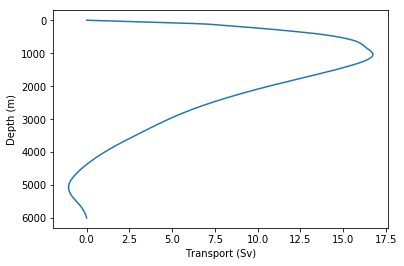

In [3]:
outfile = ('/home/users/jordi/RAPID_data/moc_vertical.nc')
ncid = Dataset(outfile,'r')

sf = ncid.variables['stream_function_mar'][:,:]
t = ncid.variables['time'][:]
z = ncid.variables['depth'][:]
ncid.close()

sfmean = np.mean(sf,axis=1)
    
plt.plot(sfmean,z)
plt.gca().invert_yaxis()
plt.xlabel('Transport (Sv)')
plt.ylabel('Depth (m)')